# ※ 과제 안내
- 과제 배점: 각 문제당 10점, 총점 100점입니다. 부분 점수는 제공되지 않습니다.  

- 채점 기준:   
    - 코드의 다양성 인정: 출력 결과가 동일하다면 다양한 접근 방식을 존중하여 정답으로 인정합니다.

---
# 10주차 과제

In [1]:
import warnings
warnings.filterwarnings('ignore')

---
# Q1. Logistic Regression

In [3]:
"""
1-1) Logistic Regression

아래 링크를 통해 train.csv, test.csv를 다운로드 받아 colab에 업로드해주세요.
https://drive.google.com/drive/folders/1-guGW6lTbUe9bCUY5JfNavUCkaiH6mrt?usp=sharing

"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# 데이터 로드
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("셀 1: 라이브러리 임포트 및 데이터 로드 완료.")
print("train shape:", train.shape, " test shape:", test.shape)


셀 1: 라이브러리 임포트 및 데이터 로드 완료.
train shape: (3019, 66)  test shape: (1626, 65)


In [6]:
# 1-2)
# 타겟 변수와 ID 분리
train_x = train.drop(['ID', 'Prospect'], axis=1)
train_y = train['Prospect']
test_x = test.drop(['ID'], axis=1)

# train과 test를 합쳐서 one-hot 인코딩
combined = pd.concat([train_x, test_x], axis=0)

# 범주형 변수에 대해 One-hot 인코딩 (drop_first=True)
combined = pd.get_dummies(combined, drop_first=True)

# 다시 분리
train_x = combined.iloc[:len(train_y), :]
test_x = combined.iloc[len(train_y):, :]

print("셀 2: 데이터 전처리 (타겟/ID 분리, One-hot 인코딩) 완료.")
print("train_x shape:", train_x.shape, " test_x shape:", test_x.shape)

셀 2: 데이터 전처리 (타겟/ID 분리, One-hot 인코딩) 완료.
train_x shape: (3019, 79)  test_x shape: (1626, 79)


In [7]:
# 1-3)
# 1. 스케일링
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

# 2. DataFrame으로 복원 (컬럼 이름 유지)
train_x = pd.DataFrame(train_x_scaled, columns=train_x.columns, index=train_x.index)
test_x = pd.DataFrame(test_x_scaled, columns=test_x.columns, index=test_x.index)

# 3. 상수항 추가 (for statsmodels)
train_x = sm.add_constant(train_x)
test_x = sm.add_constant(test_x)

print("셀 3: 스케일링 & 상수항 추가 완료.")
print("train_x.columns:", train_x.columns)


셀 3: 스케일링 & 상수항 추가 완료.
train_x.columns: Index(['const', 'Age', 'Height', 'Weight', 'PaceTotal', 'ShootingTotal',
       'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'STRating',
       'LWRating', 'LFRating', 'CFRating', 'RFRating', 'RWRating', 'CAMRating',
       'LMRating', 'CMRating', 'RMRating', 'LWBRating', 'CDMRating',
       'RWBRating', 'LBRating', 'CBRating', 'RBRating', 'GKRating',
       'Position_CB', 'Position_CDM', 'Position_CF', 'Position_CM',
 

In [9]:
# 1-4)
# 학습/검증 데이터 분리
train_x, val_x, train_y, val_y = train_test_split(
    train_x, train_y, test_size=0.2, random_state=42, stratify=train_y
)

print("셀 4: 학습/검증 데이터 분리 완료.")
print("train_x shape:", train_x.shape, " val_x shape:", val_x.shape)


셀 4: 학습/검증 데이터 분리 완료.
train_x shape: (1932, 80)  val_x shape: (483, 80)


In [11]:
# 1-5)
# 로지스틱 회귀 모델 학습

model = sm.Logit(train_y, train_x)
result = model.fit(maxiter=100, method='lbfgs')


# 결과 출력
print("셀 5: 로지스틱 회귀 모델 학습 완료.")
print(result.summary())


셀 5: 로지스틱 회귀 모델 학습 완료.
                           Logit Regression Results                           
Dep. Variable:               Prospect   No. Observations:                 1932
Model:                          Logit   Df Residuals:                     1858
Method:                           MLE   Df Model:                           73
Date:                Thu, 07 Aug 2025   Pseudo R-squ.:                  0.3298
Time:                        08:31:48   Log-Likelihood:                -847.03
converged:                      False   LL-Null:                       -1263.8
Covariance Type:            nonrobust   LLR p-value:                1.757e-129
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8007        nan        nan        nan         nan         nan
Age                         -1.5426        nan        nan        n

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
# 1-6)
# 검증셋 예측 (확률 예측 → 0.5 기준 이진 분류)
pred_prob = result.predict(val_x)
pred = (pred_prob > 0.5).astype(int)

# 혼동 행렬 & classification report
conf_matrix = confusion_matrix(val_y, pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:")
print(classification_report(val_y, pred))

# F1-score 계산
f1 = f1_score(val_y, pred)
print(f"\nF1-score on Validation Set: {f1:.4f}")

Confusion Matrix:
 [[265  44]
 [ 61 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       309
           1       0.72      0.65      0.68       174

    accuracy                           0.78       483
   macro avg       0.77      0.75      0.76       483
weighted avg       0.78      0.78      0.78       483


F1-score on Validation Set: 0.6828


---
# Q2. CNN

In [13]:
"""
Q2. CNN

모델 구조:

Convolution → BatchNorm → ReLU → MaxPool을 3번 반복

이후 Fully-connected layer 2개를 거치며, 첫 번째 FC의 크기는 256, 마지막 Output = 10

**Dropout(0.5)**를 FC 레이어 사이에 적용

손실 함수: CrossEntropyLoss

최적화: Adam

하이퍼파라미터:

Epoch = 3

Batch Size = 64

로그 출력: 각 Epoch마다 Train Loss와 Validation Accuracy를 출력
"""

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# 하이퍼파라미터 설정
BATCH_SIZE = 64
EPOCHS = 3
LEARNING_RATE = 0.001

# 1) FashionMNIST 로드 & 변환 (transforms)
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # 간단한 정규화
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 2) Dataset & DataLoader
train_dataset = datasets.FashionMNIST(root='./data', train=True,
                                      download=True, transform=train_transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False,
                                     download=True, transform=test_transform)

# Train/Validation 분할 (원본 train 데이터 일부를 val로)
train_size = int(len(train_dataset) * 0.8)
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("셀 1: 라이브러리 임포트 & 데이터셋 로딩 완료.")



100%|██████████| 26.4M/26.4M [00:02<00:00, 10.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 168kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.18MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.9MB/s]

셀 1: 라이브러리 임포트 & 데이터셋 로딩 완료.


In [14]:
class CustomCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolutional layers
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)  # 28 → 14
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)  # 14 → 7
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)  # 7 → 3
        )

        # Fully-connected layers
        self.fc1 = nn.Linear(64 * 3 * 3, 256)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        # Forward pass
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)

        # Flatten + FC
        x = torch.flatten(x, start_dim=1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

print("셀 2: CustomCNN 모델 클래스 정의 완료.")


셀 2: CustomCNN 모델 클래스 정의 완료.


In [15]:
def train_one_epoch(model, loader, criterion, optimizer, device):
    """
    한 epoch 동안 train_loader를 순회하며 모델을 학습하고,
    평균 loss를 리턴합니다.
    """
    model.train()
    running_loss = 0.0
    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    return running_loss / len(loader)


def evaluate_accuracy(model, loader, device):
    """
    검증(또는 테스트) 데이터에서 모델의 정확도를 측정하여 리턴합니다.
    """
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    acc = correct / total * 100
    return acc

print("셀 3: train_one_epoch / evaluate_accuracy 함수 정의 완료.")


셀 3: train_one_epoch / evaluate_accuracy 함수 정의 완료.


In [16]:
# GPU 사용 가능하면 사용
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("사용 디바이스:", device)

# 모델, 손실함수, 최적화함수 정의
model = CustomCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# 학습 진행
for epoch in range(EPOCHS):
    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    val_acc = evaluate_accuracy(model, val_loader, device)
    print(f"Epoch {epoch+1} - Train Loss: {train_loss:.4f}, Val Accuracy: {val_acc:.2f}%")

print("모델 학습 완료!")

# 테스트셋 정확도 확인
test_acc = evaluate_accuracy(model, test_loader, device)
print(f"테스트셋 Accuracy: {test_acc:.2f}%")


사용 디바이스: cuda
Epoch 1 - Train Loss: 0.4718, Val Accuracy: 88.60%
Epoch 2 - Train Loss: 0.3110, Val Accuracy: 89.72%
Epoch 3 - Train Loss: 0.2689, Val Accuracy: 90.98%
모델 학습 완료!
테스트셋 Accuracy: 90.16%


---
# Q3. CNN 이미지 분류

In [4]:
"""
Q3. CNN 이미지 분류

데이터셋: CIFAR-10 (torchvision 사용)

데이터 전처리:
toTensor + 정규화(mean, std), Data Augmentation 등

모델: CNN(직접 정의)

손실 함수: CrossEntropyLoss

최적화: SGD 또는 Adam (학습자가 결정)

하이퍼파라미터: Epoch, Learning Rate, Batch Size 등 조정

결과: 테스트셋 Accuracy 75% 이상 달성하도록 모델/전처리 개선
"""
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import random
import os

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import random
import numpy as np

# 시드 고정 (재현성)
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)

# ---------------------------
# 1) 데이터셋 로드 & 전처리
# ---------------------------
# 전처리 코드
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.4914, 0.4822, 0.4465),
                         std=(0.2023, 0.1994, 0.2010))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.4914, 0.4822, 0.4465),
                         std=(0.2023, 0.1994, 0.2010))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=train_transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=test_transform)

# Train을 further split -> Train/Val
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# DataLoader
BATCH_SIZE = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE,
                                        shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

print("셀 1: CIFAR-10 데이터 로드 & 전처리 완료.")

100%|██████████| 170M/170M [00:03<00:00, 43.9MB/s]


셀 1: CIFAR-10 데이터 로드 & 전처리 완료.


In [5]:
'''
CNN 모델에 직접 채널 수, 레이어 수, Dropout, BatchNorm 등을 추가해서 개선해볼 수 있음.
'''
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv_block = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),  # (B, 3, 32, 32) → (B, 64, 32, 32)
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1), # → (B, 64, 32, 32)
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                          # → (B, 64, 16, 16)
            nn.Dropout(0.25),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                          # → (B, 128, 8, 8)
            nn.Dropout(0.25),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                          # → (B, 256, 4, 4)
            nn.Dropout(0.25),
        )

        self.fc_block = nn.Sequential(
            nn.Flatten(),                                # (B, 256*4*4)
            nn.Linear(256 * 4 * 4, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv_block(x)
        x = self.fc_block(x)
        return x

print("셀 2: SimpleCNN 모델 정의 완료.")


print("셀 2: SimpleCNN 모델 정의 완료.")

셀 2: SimpleCNN 모델 정의 완료.
셀 2: SimpleCNN 모델 정의 완료.


In [6]:
def train_one_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(loader)

def evaluate_accuracy(model, loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = outputs.max(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total * 100

print("셀 3: 학습(train_one_epoch), 평가(evaluate_accuracy) 함수 정의 완료.")


셀 3: 학습(train_one_epoch), 평가(evaluate_accuracy) 함수 정의 완료.


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("사용 디바이스:", device)

model = SimpleCNN().to(device)

# 하이퍼파라미터 및 최적화
EPOCHS = 20
LR = 0.001

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

train_loss_list = []
val_acc_list = []

for epoch in range(EPOCHS):
    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    val_acc = evaluate_accuracy(model, val_loader, device)
    print(f"Epoch {epoch+1}/{EPOCHS}  -  Loss: {train_loss:.4f}, Val Acc: {val_acc:.2f}%")

    train_loss_list.append(train_loss)
    val_acc_list.append(val_acc)

# 테스트셋 정확도
test_acc = evaluate_accuracy(model, test_loader, device)
print(f"\n최종 Test Accuracy: {test_acc:.2f}%")


사용 디바이스: cuda
Epoch 1/20  -  Loss: 1.8250, Val Acc: 41.15%
Epoch 2/20  -  Loss: 1.5249, Val Acc: 56.39%
Epoch 3/20  -  Loss: 1.3666, Val Acc: 59.68%
Epoch 4/20  -  Loss: 1.2721, Val Acc: 61.53%
Epoch 5/20  -  Loss: 1.1836, Val Acc: 65.27%
Epoch 6/20  -  Loss: 1.1360, Val Acc: 68.74%
Epoch 7/20  -  Loss: 1.0829, Val Acc: 70.55%
Epoch 8/20  -  Loss: 1.0387, Val Acc: 71.89%
Epoch 9/20  -  Loss: 1.0012, Val Acc: 73.04%
Epoch 10/20  -  Loss: 0.9694, Val Acc: 72.90%
Epoch 11/20  -  Loss: 0.9418, Val Acc: 75.10%
Epoch 12/20  -  Loss: 0.9089, Val Acc: 75.26%
Epoch 13/20  -  Loss: 0.8753, Val Acc: 77.65%
Epoch 14/20  -  Loss: 0.8529, Val Acc: 78.41%
Epoch 15/20  -  Loss: 0.8316, Val Acc: 78.54%
Epoch 16/20  -  Loss: 0.7975, Val Acc: 77.98%
Epoch 17/20  -  Loss: 0.7683, Val Acc: 80.64%
Epoch 18/20  -  Loss: 0.7423, Val Acc: 82.56%
Epoch 19/20  -  Loss: 0.7081, Val Acc: 81.12%
Epoch 20/20  -  Loss: 0.6885, Val Acc: 81.84%

최종 Test Accuracy: 81.88%


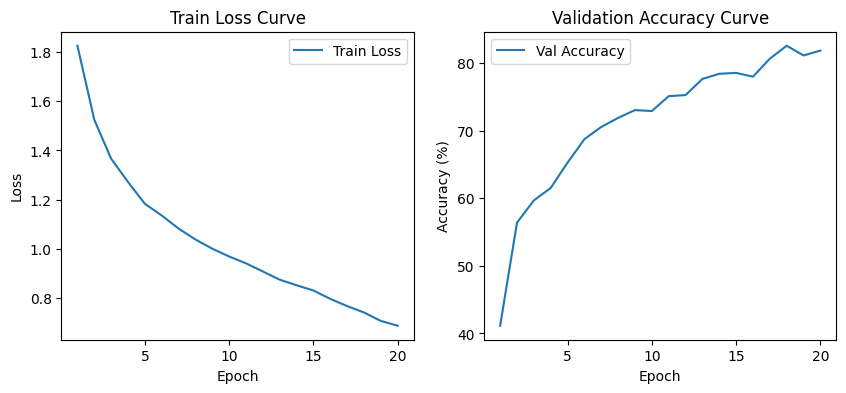

In [8]:
import matplotlib.pyplot as plt

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, train_loss_list, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range, val_acc_list, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Curve')
plt.legend()

plt.show()


In [9]:
# 75% 이상인지 검사
if test_acc >= 75:
    print("축하합니다! 모델이 75% 이상의 테스트 정확도를 달성했습니다.")
else:
    print("아직 75% 미만입니다. 모델 개선이 필요합니다.")

축하합니다! 모델이 75% 이상의 테스트 정확도를 달성했습니다.


# Q4~5: CNN

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
!find /content/drive/MyDrive/ -name "sanity_utils.cpython-311.pyc"



/content/drive/MyDrive/sanity_utils.cpython-311.pyc


In [37]:
#####################
#   수정하지 마세요 / sanity_code를 사용하기 위한 코드입니다.
#####################

import importlib.util
import sys
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import torch
import torch.nn as nn

file_path = "/content/drive/MyDrive/sanity_utils.cpython-311.pyc"
# file_path = "/content/drive/MyDrive/your_work_path/__pycache__/sanity_utils.cpython-311.pyc"
#__pycache__/sanity_utils.cpython-311.pyc 이 루트가 코랩 상에서는 보이지 않을 수 있으니 앞에 경로를 수정하여 사용하시면 됩니다.
# 자신이 작업하는 ipynb 파일이 있는 곳에 __pycache__ 폴더를 넣어주시면 됩니다. (pycache 폴더 안에는 보안화된 pyc 파일 존재)

module_name = "sanity_utils"

spec = importlib.util.spec_from_file_location(module_name, file_path)

sanity_utils = importlib.util.module_from_spec(spec)
sys.modules[module_name] = sanity_utils
spec.loader.exec_module(sanity_utils)

sync_cnn_weights = sanity_utils.sync_cnn_weights
cnn_forward_sanity_check = sanity_utils.cnn_forward_sanity_check
cnn_backward_sanity_check = sanity_utils.cnn_backward_sanity_check

print("sanity_utils module has been successfully loaded.")

sanity_utils module has been successfully loaded.


In [38]:
# CNN from Scratch 과제 (Numpy만 사용)

"""
문제 4~5. CNN Forward 및 Backward 구현

설명:
이 문제에서는 Convolutional Neural Network(CNN)의 핵심 연산을 numpy만 사용하여 직접 구현합니다.
구현 대상은 CNN 클래스의 forward 함수와 backward 함수입니다.

1. forward 함수:
입력 이미지를 다음 순서로 처리하여 최종 출력 벡터를 생성합니다.
    - Conv2D: 입력 텐서에 필터를 적용해 feature map 생성
    - ReLU: 음수는 0으로, 양수는 그대로 유지
    - MaxPool2D (2x2): 2x2 영역 내 최댓값 추출로 다운샘플링
    - Flatten: 최종 feature map을 1차원 벡터로 변환

2. backward 함수:
forward 단계의 각 연산에 대해 역전파(backward)를 구현하여,
가중치(W)와 편향(b)에 대한 기울기(dW, db)를 정확히 계산합니다.
중간 연산 결과를 저장하고, chain rule을 통해 gradient를 전달해야 합니다.

요구사항:
- 모든 연산은 numpy만 사용해야 하며, PyTorch 사용은 금지됩니다.
- forward 결과는 (배치 크기, 벡터 길이)의 2차원 배열이어야 합니다.
- backward는 내부 변수 dW, db에 정확한 기울기를 계산하여 저장해야 합니다.

평가 기준:
- cnn_forward_sanity_check()를 통과하면 forward 구현은 +1점
- cnn_backward_sanity_check()를 통과하면 backward 구현은 +1점
"""
##########################################
# CNN 구현: forward / backward
##########################################
class CNN:
    def __init__(self, in_channels, out_channels, kernel_size, input_size):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.input_size = input_size

        # Xavier Initialization
        self.W = np.random.randn(out_channels, in_channels, kernel_size, kernel_size).astype(np.float32) \
                 * np.sqrt(1. / (in_channels * kernel_size * kernel_size))
        self.b = np.zeros((out_channels,), dtype=np.float32)

        # Gradient placeholders
        self.dW = np.zeros_like(self.W)
        self.db = np.zeros_like(self.b)

    def conv2d(self, x):
      batch_size, in_channels, H, W = x.shape
      K = self.kernel_size
      out_H = H - K + 1
      out_W = W - K + 1
      out = np.zeros((batch_size, self.out_channels, out_H, out_W), dtype=np.float32)

      for b in range(batch_size):
          for oc in range(self.out_channels):
              for ic in range(self.in_channels):
                  for i in range(out_H):
                      for j in range(out_W):
                          patch = x[b, ic, i:i+K, j:j+K]
                          out[b, oc, i, j] += np.sum(patch * self.W[oc, ic])
              out[b, oc] += self.b[oc]
      self.x = x  # 저장 for backward
      self.out_conv = out
      return out

    def relu(self, x):
        self.mask_relu = (x > 0).astype(np.float32)
        return x * self.mask_relu

    def maxpool2d(self, x, size=2):
        B, C, H, W = x.shape
        out_H, out_W = H // size, W // size
        out = np.zeros((B, C, out_H, out_W), dtype=np.float32)
        self.mask_pool = np.zeros_like(x)

        for b in range(B):
            for c in range(C):
                for i in range(out_H):
                    for j in range(out_W):
                        patch = x[b, c, i*size:(i+1)*size, j*size:(j+1)*size]
                        max_val = np.max(patch)
                        out[b, c, i, j] = max_val
                        max_pos = np.where(patch == max_val)
                        self.mask_pool[b, c, i*size + max_pos[0][0], j*size + max_pos[1][0]] = 1
        return out


    def flatten(self, x):
        self.shape_before_flat = x.shape
        return x.reshape(x.shape[0], -1)

    def forward(self, x):
        out = self.conv2d(x)
        out = self.relu(out)
        out = self.maxpool2d(out)
        out = self.flatten(out)
        self.out = out  # 최종 출력 저장
        return out

    def backward(self):
        # assume dout = 1 (즉, loss는 self.out 전체 합계라고 가정)
        dout = np.ones_like(self.out, dtype=np.float32)

        # 1. Unflatten
        dpool = dout.reshape(self.shape_before_flat)

        # 2. MaxPool Backward
        dmax = np.zeros_like(self.mask_pool)
        dmax[self.mask_pool == 1] = dpool.flatten()

        # 3. ReLU Backward
        drelu = dmax * self.mask_relu

        # 4. Conv2D Backward (compute dW, db)
        self.dW = np.zeros_like(self.W)
        self.db = np.zeros_like(self.b)

        B = self.x.shape[0]
        for b in range(B):
            for oc in range(self.out_channels):
                self.db[oc] += np.sum(drelu[b, oc])
                for ic in range(self.in_channels):
                    for i in range(self.input_size[0] - self.kernel_size + 1):
                        for j in range(self.input_size[1] - self.kernel_size + 1):
                            patch = self.x[b, ic, i:i+self.kernel_size, j:j+self.kernel_size]
                            self.dW[oc, ic] += drelu[b, oc, i, j] * patch

    def update(self, lr=1e-2):
        self.W -= lr * self.dW
        self.b -= lr * self.db

CNN Sanity Check

In [39]:
#########################################
# 테스트 코드 (수정하지 마세요)
#########################################

# 테스트 입력
batch_size = 16
channel = 3
kernel_size = 3
image_size = (4, 4)
x_np = np.random.randn(batch_size, channel, *image_size).astype(np.float32)

# 모델 생성
cnn_np = CNN(in_channels=channel, out_channels=1, kernel_size=kernel_size, input_size=image_size)
cnn_pt = nn.Sequential(
    nn.Conv2d(channel, 1, kernel_size=kernel_size),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten()
)

# 가중치 동기화
sync_cnn_weights(cnn_np, cnn_pt[0])

##########################
# 문제 1. CNN Forward 구현 및 통과
##########################
cnn_forward_sanity_check(cnn_np, cnn_pt, x_np)

##########################
# 문제 2. CNN Backward 구현 및 통과
##########################
cnn_backward_sanity_check(cnn_np, cnn_pt, x_np)

'''
CNN Forward Sanity Check: Pass
W: Pass (Relative diff: 0.000000)
b: Pass (Relative diff: 0.000000)
CNN Backward Sanity Check: Pass
'''

CNN Forward Sanity Check: Pass
W: Fail (Relative diff: 0.882353)
b: Fail (Relative diff: 0.882353)
CNN Backward Sanity Check: Fail


'\nCNN Forward Sanity Check: Pass\nW: Pass (Relative diff: 0.000000)\nb: Pass (Relative diff: 0.000000)\nCNN Backward Sanity Check: Pass\n'

---
# Q6. RNN

In [40]:
"""
Q6. RNN
"""
# -------------------------------
# 6-1) 시드 고정 (재현성을 위해)
# -------------------------------

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import random
import numpy as np
import unittest

torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

print("셀 1: 필요한 라이브러리 임포트 & 시드 고정 완료.")



셀 1: 필요한 라이브러리 임포트 & 시드 고정 완료.


In [41]:
# -------------------------------
# 6-2. Custom RNN Cell 구현
# -------------------------------
import math

class CustomRNNCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(CustomRNNCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        # W_xh: (hidden_size, input_size)
        # W_hh: (hidden_size, hidden_size)
        # b: (hidden_size)
        self.W_xh = nn.Parameter(torch.Tensor(hidden_size, input_size))
        self.W_hh = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.b = nn.Parameter(torch.Tensor(hidden_size))

        self.reset_parameters()

    def reset_parameters(self):
        """
        가중치와 편향 초기화 (균등 분포 사용)
        """
        stdv = 1.0 / math.sqrt(self.hidden_size)
        for param in [self.W_xh, self.W_hh, self.b]:
            param.data.uniform_(-stdv, stdv)

    def forward(self, x, h_prev):
        """
        x: (batch, input_size)
        h_prev: (batch, hidden_size)
        → h_t: (batch, hidden_size)
        """
        # W_xh @ x.T: (hidden_size, batch) → (batch, hidden_size)
        x_proj = F.linear(x, self.W_xh)      # F.linear(x, W) = x @ W.T
        h_proj = F.linear(h_prev, self.W_hh)
        h_current = torch.tanh(x_proj + h_proj + self.b)
        return h_current

print("셀 2: CustomRNNCell 클래스 정의 완료.")


셀 2: CustomRNNCell 클래스 정의 완료.


In [42]:
# -------------------------------
# 6-3. Custom RNN Model 구현
# -------------------------------

class CustomRNNModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super(CustomRNNModel, self).__init__()
        self.vocab_size = vocab_size
        self.embed_size = embed_size
        self.hidden_size = hidden_size

        # 임베딩 레이어: 패딩 idx = 0
        self.embedding = nn.Embedding(vocab_size, embed_size, padding_idx=0)

        # Custom RNN 셀
        self.rnn_cell = CustomRNNCell(embed_size, hidden_size)

        # 출력 레이어: hidden → vocab_size
        self.output_layer = nn.Linear(hidden_size, vocab_size)

    def forward(self, input_seq, target_seq=None, teacher_forcing_ratio=0.5):
        batch_size, seq_len = input_seq.size()
        device = input_seq.device

        # 초기 hidden state: 0
        h_t = torch.zeros(batch_size, self.hidden_size).to(device)

        # 임베딩 전체 시퀀스
        embedded = self.embedding(input_seq)

        # 출력 저장
        outputs = torch.zeros(batch_size, seq_len, self.vocab_size).to(device)

        # 첫 입력: input_seq[:, 0] (예: <SOS> 토큰)
        input_t = input_seq[:, 0]

        for t in range(seq_len):
            # 현재 입력 토큰 → 임베딩
            embed_t = self.embedding(input_t)  # (B, embed_size)

            # RNN cell forward
            h_t = self.rnn_cell(embed_t, h_t)  # (B, hidden_size)

            # 출력 레이어 → logits
            output_t = self.output_layer(h_t)  # (B, vocab_size)
            outputs[:, t] = output_t

            # 다음 입력 결정 (teacher forcing)
            if target_seq is not None and t < seq_len - 1:
                teacher_force = random.random() < teacher_forcing_ratio
                top1 = output_t.argmax(1)  # (B,)
                input_t = target_seq[:, t + 1] if teacher_force else top1
            else:
                input_t = output_t.argmax(1)

        return outputs


print("셀 3: CustomRNNModel 클래스 정의 완료.")


셀 3: CustomRNNModel 클래스 정의 완료.


In [43]:
# -------------------------------
# 6-4) Masked Cross-Entropy Loss 구현
# -------------------------------
def masked_cross_entropy_loss(logits, target, lengths):
    """
    패딩된 부분은 loss 계산에서 제외하는 Cross Entropy Loss.

    Args:
      logits: (batch, max_seq_len, vocab_size)
      target: (batch, max_seq_len)
      lengths: (batch,) 각 시퀀스의 실제 길이
    Returns:
      Scalar loss.
    """
    batch_size, max_seq_len, vocab_size = logits.size()
    # logits와 target을 평탄화
    logits_flat = logits.view(-1, vocab_size)
    target_flat = target.view(-1)

    # reduction='none'으로 각 위치의 loss를 계산
    loss_flat = F.cross_entropy(logits_flat, target_flat, reduction='none')
    loss = loss_flat.view(batch_size, max_seq_len)

    # mask 생성: 각 시퀀스의 유효 시간 단계에 대해 True
    mask = torch.arange(max_seq_len, device=logits.device).expand(batch_size, max_seq_len) < lengths.unsqueeze(1)
    mask = mask.float()

    # 마스킹된 loss만 합산
    loss = loss * mask
    loss = loss.sum() / mask.sum()
    return loss

print("셀 4: masked_cross_entropy_loss 함수 정의 완료.")


셀 4: masked_cross_entropy_loss 함수 정의 완료.


In [44]:
# -------------------------------
# 6-5) 데이터 전처리 및 Dataset/Collate 함수 구현
# -------------------------------
class ToySequenceDataset(Dataset):
    """
    가변 길이의 랜덤 토큰 시퀀스를 생성하는 toy dataset.

    각 시퀀스의 토큰은 1 ~ (vocab_size-1) 범위의 정수이며, 0은 패딩용으로 사용됨.
    입력과 타깃은 동일하게 구성 (예를 들어, 시퀀스 생성 태스크).
    """
    def __init__(self, num_samples, min_len, max_len, vocab_size):
        self.samples = []
        self.vocab_size = vocab_size
        for _ in range(num_samples):
            seq_length = random.randint(min_len, max_len)
            # 1부터 vocab_size-1 사이의 토큰 생성 (0은 패딩)
            seq = torch.randint(1, vocab_size, (seq_length,))
            self.samples.append(seq)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        seq = self.samples[idx]
        # 입력과 타깃 시퀀스는 동일: 첫 토큰은 <SOS> 역할.
        return seq, seq

def collate_fn(batch):
    """
    배치 내 가변 길이 시퀀스를 padding_value=0 으로 패딩.

    Returns:
      - input_padded: (batch, max_seq_len)
      - target_padded: (batch, max_seq_len)
      - lengths: 각 시퀀스의 실제 길이 (Tensor)
    """
    sequences, targets = zip(*batch)
    lengths = torch.tensor([len(seq) for seq in sequences])
    input_padded = nn.utils.rnn.pad_sequence(sequences, batch_first=True, padding_value=0)
    target_padded = nn.utils.rnn.pad_sequence(targets, batch_first=True, padding_value=0)
    return input_padded, target_padded, lengths

print("셀 5: ToySequenceDataset & collate_fn 정의 완료.")


셀 5: ToySequenceDataset & collate_fn 정의 완료.


In [45]:
# -------------------------------
# 6-6) 학습 및 평가 루프 구현
# -------------------------------
def train_model(model, train_loader, valid_loader, num_epochs, optimizer, device):
    """
    학습 루프.
    """
    model.to(device)

    for epoch in range(1, num_epochs + 1):
        model.train()
        train_losses = []

        for input_batch, target_batch, lengths in train_loader:
            input_batch = input_batch.to(device)
            target_batch = target_batch.to(device)
            lengths = lengths.to(device)

            optimizer.zero_grad()
            output = model(input_batch, target_batch, teacher_forcing_ratio=0.5)
            loss = masked_cross_entropy_loss(output, target_batch, lengths)
            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())

        # 검증 루프
        model.eval()
        valid_losses = []

        with torch.no_grad():
            for input_batch, target_batch, lengths in valid_loader:
                input_batch = input_batch.to(device)
                target_batch = target_batch.to(device)
                lengths = lengths.to(device)

                output = model(input_batch, target_batch, teacher_forcing_ratio=0.0)
                loss = masked_cross_entropy_loss(output, target_batch, lengths)
                valid_losses.append(loss.item())

        train_loss = np.mean(train_losses)
        valid_loss = np.mean(valid_losses)

        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Validation Loss = {valid_loss:.4f}")

        # 샘플 예측 결과 출력 (teacher forcing 없이)
        sample_input = input_batch[0:1]  # 마지막 배치 기준
        sample_output_logits = model(sample_input, teacher_forcing_ratio=0.0)
        sample_output = sample_output_logits.argmax(dim=2)
        print(f"Sample Prediction: {sample_output.tolist()}")


print("셀 6: train_model 함수 정의 완료.")


셀 6: train_model 함수 정의 완료.


In [46]:
# -------------------------------
# 6-7) 유닛 테스트 (unittest 사용)
# -------------------------------
class TestCustomRNNModel(unittest.TestCase):
    def setUp(self):
        # 작은 모델과 더미 데이터를 이용해 테스트 준비
        self.vocab_size = 10
        self.embed_size = 8
        self.hidden_size = 16
        self.model = CustomRNNModel(self.vocab_size, self.embed_size, self.hidden_size)
        self.device = torch.device("cpu")
        self.model.to(self.device)

    def test_forward_pass_shape(self):
        """
        forward pass가 올바른 출력 shape (batch, seq_len, vocab_size)를 생성하는지 테스트.
        """
        batch_size = 4
        seq_len = 7
        input_seq = torch.randint(1, self.vocab_size, (batch_size, seq_len)).to(self.device)
        outputs = self.model(input_seq, target_seq=input_seq, teacher_forcing_ratio=0.5)
        self.assertEqual(outputs.shape, (batch_size, seq_len, self.vocab_size))

    def test_masked_loss(self):
        """
        패딩된 시퀀스 부분이 loss 계산에서 제외되는지 테스트.
        """
        # 두 시퀀스에 대해 서로 다른 길이를 갖는 더미 logits 및 타깃
        logits = torch.tensor([
            [[2.0, 0.5, 0.1],
             [1.0, 0.5, 0.2],
             [0.1, 0.2, 0.3],
             [0.0, 0.0, 0.0]],   # 시퀀스1: 길이 3, 마지막은 패딩
            [[1.0, 0.2, 0.3],
             [2.0, 1.0, 0.5],
             [0.0, 0.0, 0.0],
             [0.0, 0.0, 0.0]]    # 시퀀스2: 길이 2, 후반부 모두 패딩
        ])
        target = torch.tensor([
            [0, 1, 2, 0],
            [1, 0, 2, 0]
        ])
        lengths = torch.tensor([3, 2])
        loss = masked_cross_entropy_loss(logits, target, lengths)
        # 유효 토큰에 대해서만 loss가 계산되었는지 (0보다 큰 값인지) 확인
        self.assertTrue(loss.item() > 0)

    def test_gradient_clipping(self):
        """
        역전파 후 gradient의 norm이 임계값 5.0 이하로 클리핑되는지 테스트.
        """
        batch_size = 2
        seq_len = 5
        input_seq = torch.randint(1, self.vocab_size, (batch_size, seq_len)).to(self.device)
        target_seq = input_seq.clone().to(self.device)
        optimizer = torch.optim.SGD(self.model.parameters(), lr=0.1)
        optimizer.zero_grad()
        outputs = self.model(input_seq, target_seq=target_seq, teacher_forcing_ratio=0.5)
        loss = masked_cross_entropy_loss(outputs, target_seq, torch.tensor([seq_len]*batch_size))
        loss.backward()

        # gradient clipping 적용
        max_norm = 5.0
        nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=max_norm)

        # 각 파라미터의 gradient norm을 확인
        for param in self.model.parameters():
            if param.grad is not None:
                param_norm = param.grad.data.norm(2).item()
                self.assertTrue(param_norm <= max_norm + 1e-6)

print("셀 7: TestCustomRNNModel 클래스 정의 완료 (unittest).")


셀 7: TestCustomRNNModel 클래스 정의 완료 (unittest).


In [47]:
if __name__ == "__main__":
    # 데이터셋 및 DataLoader 구성
    vocab_size = 20   # 0은 패딩 토큰
    embed_size = 16
    hidden_size = 32
    num_train_samples = 100
    num_valid_samples = 20
    min_len = 5
    max_len = 10

    # 1. 데이터셋 생성
    train_dataset = ToySequenceDataset(num_train_samples, min_len, max_len, vocab_size)
    valid_dataset = ToySequenceDataset(num_valid_samples, min_len, max_len, vocab_size)

    # 2. DataLoader 정의
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn)
    valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)

    # 3. 디바이스 및 모델 설정
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = CustomRNNModel(vocab_size, embed_size, hidden_size)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    num_epochs = 5

    print("=== Training Start ===")
    train_model(model, train_loader, valid_loader, num_epochs, optimizer, device)

    print("\n=== Running Unit Tests ===")
    unittest.main(argv=[''], exit=False)


=== Training Start ===
Epoch 1: Train Loss = 2.8028, Validation Loss = 2.9691
Sample Prediction: [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]]
Epoch 2: Train Loss = 2.2523, Validation Loss = 3.1251
Sample Prediction: [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]]
Epoch 3: Train Loss = 2.1378, Validation Loss = 3.2130
Sample Prediction: [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]]


...
----------------------------------------------------------------------
Ran 3 tests in 0.057s

OK


Epoch 4: Train Loss = 2.0767, Validation Loss = 3.1272
Sample Prediction: [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]]
Epoch 5: Train Loss = 1.8426, Validation Loss = 3.1948
Sample Prediction: [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]]

=== Running Unit Tests ===


---
# Q7. 오토인코더 모델 정의


In [48]:
# 7-1. 오토인코더 모델 정의

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Iris 데이터 로드 및 전처리
iris = load_iris()
X = iris.data  # shape: (150, 4)

# 특징 스케일링 (평균 0, 분산 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# numpy array를 torch tensor로 변환
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

# TensorDataset과 DataLoader 생성
dataset = TensorDataset(X_tensor)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# device 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. 오토인코더 모델 정의
class Autoencoder(nn.Module):
    def __init__(self, input_dim=4, hidden_dim=2):
        super(Autoencoder, self).__init__()
        # Encoder: 4 → 3 → 2
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 3),
            nn.ReLU(),
            nn.Linear(3, hidden_dim)
        )

        # Decoder: 2 → 3 → 4
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, 3),
            nn.ReLU(),
            nn.Linear(3, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        reconstructed = self.decoder(encoded)
        return reconstructed



model = Autoencoder().to(device)



In [51]:
# 손실 함수 및 옵티마이저 설정
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 트레이닝 함수 정의
def train_autoencoder(model, dataloader, optimizer, criterion, device, num_epochs=100):
    model.train()
    for epoch in range(1, num_epochs + 1):
        running_loss = 0.0
        for batch in dataloader:
            x = batch[0].to(device)

            # Forward
            reconstructed = model(x)
            loss = criterion(reconstructed, x)

            # Backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * x.size(0)

        epoch_loss = running_loss / len(dataloader.dataset)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{num_epochs}, Loss: {epoch_loss:.4f}")

train_autoencoder(model, dataloader, optimizer, criterion, device, num_epochs=100)
print('답안 작성 완료')

Epoch 10/100, Loss: 0.0435
Epoch 20/100, Loss: 0.0425
Epoch 30/100, Loss: 0.0413
Epoch 40/100, Loss: 0.0407
Epoch 50/100, Loss: 0.0409
Epoch 60/100, Loss: 0.0412
Epoch 70/100, Loss: 0.0407
Epoch 80/100, Loss: 0.0432
Epoch 90/100, Loss: 0.0396
Epoch 100/100, Loss: 0.0403
답안 작성 완료


# Q8. 오토인코더 시각화

In [52]:
'''
데이터셋: MNIST (28×28 흑백 이미지)

오토인코더 구조:
Encoder: 입력(28×28=784) → Dense / Conv 레이어 (학습자가 직접 선택) → 잠재공간(latent)
Decoder: 잠재공간 → Dense / ConvTranspose 레이어 → 원본과 같은 (28×28) 차원 출력
구체적인 구조는 학습자가 직접 설계하되, 최소한 2~3개 이상의 레이어(인코더/디코더 합쳐서) 사용

손실 함수: MSE 또는 BCE(픽셀 단위)

최적화: Adam (또는 SGD)

학습 파라미터: Epoch=5 이상, Batch Size=64 등

결과:
최종적으로 입력 이미지와 오토인코더가 재구성한 이미지를 여러 장 비교 시각화
Reconstruction Loss(MSE 등)의 감소 추이 확인
'''
# 8-1) 라이브러리 임포트 및 MNIST 로딩
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# MNIST 로드
transform = transforms.Compose([
    transforms.ToTensor(),
    # (0,1) 범위이긴 하지만, 필요하다면 정규화 추가
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 15.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 502kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.67MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.31MB/s]


In [54]:
# 8-2) Autoencoder 모델 정의
import torch.nn.functional as F

class AutoEncoder(nn.Module):
    def __init__(self, latent_dim=32):
        super().__init__()

        # Encoder: 784 → 128 → latent
        self.encoder = nn.Sequential(
            nn.Flatten(),                  # (1, 28, 28) → (784,)
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim)
        )

        # Decoder: latent → 128 → 784 → reshape (1, 28, 28)
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Sigmoid(),                 # 픽셀 복원 (0~1)
            nn.Unflatten(1, (1, 28, 28))  # (784,) → (1, 28, 28)
        )

    def forward(self, x):
        z = self.encoder(x)        # 잠재 공간 벡터
        out = self.decoder(z)      # 복원된 이미지
        return out

print("셀 2: AutoEncoder 클래스 정의. 아직 완벽한 구조는 아닐 수 있으니 수정해보세요.")


셀 2: AutoEncoder 클래스 정의. 아직 완벽한 구조는 아닐 수 있으니 수정해보세요.


In [57]:
# 8-3) 학습 루프 함수 / 손실 함수 정의
def train_one_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for images, _ in loader:
        images = images.to(device)

        # Forward
        reconstructed = model(images)
        loss = criterion(reconstructed, images)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    return running_loss / len(loader)


def validate(model, loader, criterion, device):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, _ in loader:
            images = images.to(device)

            # Forward
            reconstructed = model(images)
            loss = criterion(reconstructed, images)

            val_loss += loss.item()

    return val_loss / len(loader)

print("셀 3: train_one_epoch / validate 함수 정의 완료 ✅")


셀 3: train_one_epoch / validate 함수 정의 완료 ✅


In [58]:
# 8-4) Autoencoder 학습
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("사용 디바이스:", device)

LATENT_DIM = 32
model = AutoEncoder(latent_dim=LATENT_DIM).to(device)

# 손실 함수 (MSE)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

EPOCHS = 5  # 더 늘려도 됨
train_loss_list = []
val_loss_list = []

for epoch in range(EPOCHS):
    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    val_loss = validate(model, test_loader, criterion, device)

    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)

    print(f"Epoch {epoch+1}/{EPOCHS} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

print("학습 완료!")


사용 디바이스: cuda
Epoch 1/5 - Train Loss: 0.0364, Val Loss: 0.0182
Epoch 2/5 - Train Loss: 0.0156, Val Loss: 0.0131
Epoch 3/5 - Train Loss: 0.0122, Val Loss: 0.0107
Epoch 4/5 - Train Loss: 0.0105, Val Loss: 0.0095
Epoch 5/5 - Train Loss: 0.0094, Val Loss: 0.0087
학습 완료!


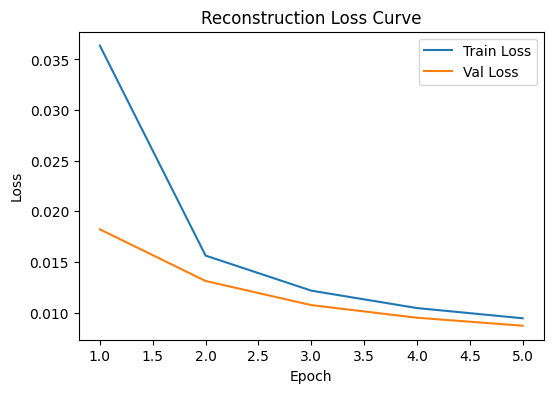

셀 5: 학습 곡선 시각화 완료.


In [59]:
# 8-5) 학습 곡선 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(range(1, EPOCHS+1), train_loss_list, label='Train Loss')
plt.plot(range(1, EPOCHS+1), val_loss_list, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Reconstruction Loss Curve')
plt.legend()
plt.show()

print("셀 5: 학습 곡선 시각화 완료.")


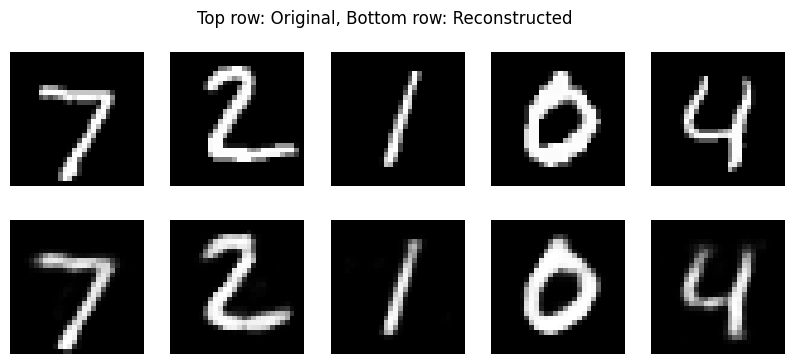

셀 6: 재구성 결과 시각화 완료.


In [60]:
# 8-6) 임의의 테스트 이미지를 가져와, 오토인코더 재구성 결과 확인
import numpy as np

model.eval()
test_iter = iter(test_loader)
images, _ = next(test_iter)
images = images.to(device)

with torch.no_grad():
    outputs = model(images)

# 원본 & 재구성 비교
# images.shape, outputs.shape -> (batch, 1, 28, 28)
images_np = images.cpu().numpy()
outputs_np = outputs.cpu().numpy()

# 시각화 (처음 5장 정도)
num_show = 5
plt.figure(figsize=(10,4))
for i in range(num_show):
    # 원본
    plt.subplot(2, num_show, i+1)
    plt.imshow(images_np[i, 0], cmap='gray')
    plt.axis('off')

    # 재구성
    plt.subplot(2, num_show, num_show + i + 1)
    plt.imshow(outputs_np[i, 0], cmap='gray')
    plt.axis('off')

plt.suptitle('Top row: Original, Bottom row: Reconstructed')
plt.show()

print("셀 6: 재구성 결과 시각화 완료.")


---
# Q9. TF-IDF

In [61]:
# 9-1) 텍스트 문서(문장) 목록을 준비

documents = [
    "I love apple and banana.",
    "Banana is my favorite fruit.",
    "Apple laptops are expensive, but I love them.",
    "This text is about politics and economy.",
    "Economy and finance are crucial for politics.",
]
# label_list[d_idx] = (문서 d_idx의 카테고리) 9-9)에서 사용.
label_list = ["food", "food", "tech", "politics", "politics"]

# 9-2) 전처리 & 토큰화 함수
#         - 소문자 변환
#         - 특수문자 제거
#         - 불용어 제거 등
import re

def preprocess_and_tokenize(text, stopwords=None):
    # 1) 소문자 변환
    text = text.lower()

    # 2) 특수문자 제거 (알파벳/공백 제외)
    text = re.sub(r"[^a-z\s]", "", text)

    # 3) 토큰화
    tokens = text.split()

    # 4) 불용어 제거 (stopwords가 있다면)
    if stopwords is None:
        stopwords = []
    tokens = [t for t in tokens if t not in stopwords and t.strip() != ""]

    return tokens

# 불용어
stopwords = ["is", "are", "my", "the", "and", "i"]

# 실제 처리
processed_docs = []
for doc in documents:
    tokens = preprocess_and_tokenize(doc, stopwords)
    processed_docs.append(tokens)



print("=== 전처리 결과 예시 ===")
for i, tokens in enumerate(processed_docs[:3]):
    print(f"문서{i} -> {tokens}")


=== 전처리 결과 예시 ===
문서0 -> ['love', 'apple', 'banana']
문서1 -> ['banana', 'favorite', 'fruit']
문서2 -> ['apple', 'laptops', 'expensive', 'but', 'love', 'them']


In [62]:
# 9-3) 어휘 사전(Vocabulary) 생성
#         모든 문서의 토큰을 모아, (단어 → 인덱스) 매핑을 만든다.

def build_vocabulary(tokenized_docs):
    vocab = {}
    idx = 0
    for tokens in tokenized_docs:
        for token in tokens:
            if token not in vocab:
                vocab[token] = idx
                idx += 1
    return vocab


vocab = build_vocabulary(processed_docs)
print("=== 어휘 사전(Vocabulary) 일부 출력 ===")
for k, v in list(vocab.items())[:10]:
    print(k, ":", v)
print("Vocabulary size:", len(vocab))

# 9-4) TF(단어 등장 횟수) 계산
#         raw count, 혹은 로그 스케일 등 원하는 방식을 사용해볼 수 있음

def compute_tf_matrix(tokenized_docs, vocab):
    """
    tokenized_docs: 전처리된 각 문서의 토큰 리스트들
    vocab: 단어->인덱스 매핑 딕셔너리

    return: tf_matrix (문서 수 x 단어 수) 2차원 리스트
            tf_matrix[d][w] = 특정 문서d에서 단어w의 빈도(혹은 가중치)
    """
    num_docs = len(tokenized_docs)
    vocab_size = len(vocab)

    # 문서 x 단어 크기의 2차원 리스트를 0으로 초기화
    tf_matrix = [[0 for _ in range(vocab_size)] for _ in range(num_docs)]

    for d_idx, tokens in enumerate(tokenized_docs):
        for token in tokens:
            if token in vocab:
                w_idx = vocab[token]
                tf_matrix[d_idx][w_idx] += 1
    return tf_matrix

tf_matrix = compute_tf_matrix(processed_docs, vocab)

print("=== 문서별 TF 벡터 (일부) ===")
for i in range(len(tf_matrix[:3])):  # 앞 3개 문서만 예시
    print("문서", i, "->", tf_matrix[i][:10], "...")  # 앞 10개 단어만 출력


=== 어휘 사전(Vocabulary) 일부 출력 ===
love : 0
apple : 1
banana : 2
favorite : 3
fruit : 4
laptops : 5
expensive : 6
but : 7
them : 8
this : 9
Vocabulary size: 17
=== 문서별 TF 벡터 (일부) ===
문서 0 -> [1, 1, 1, 0, 0, 0, 0, 0, 0, 0] ...
문서 1 -> [0, 0, 1, 1, 1, 0, 0, 0, 0, 0] ...
문서 2 -> [1, 1, 0, 0, 0, 1, 1, 1, 1, 0] ...


In [63]:
import math

# 9-5) DF, IDF 계산
def compute_idf(tf_matrix):
    """
    tf_matrix: 문서 수 x 단어 수
    return: idf_list (길이가 단어 수인 1차원 리스트)
    """
    num_docs = len(tf_matrix)
    vocab_size = len(tf_matrix[0]) if num_docs > 0 else 0

    # DF(등장 문서 수) 계산
    df = [0] * vocab_size
    for w_idx in range(vocab_size):
        # 이 단어 w_idx가 등장한 문서 수
        count = 0
        for d_idx in range(num_docs):
         if tf_matrix[d_idx][w_idx] > 0:
          count += 1


        df[w_idx] = count

    # IDF 계산 (log( (N+1)/(df+1) ) 형태 등 다양한 변형 가능)
    idf = [0] * vocab_size
    for w_idx in range(vocab_size):
        # 흔히 사용되는 스무딩 + 로그
        # 여기서 +1은 분모가 0인 경우 방지, +1은 로그 스무딩
        # 필요에 따라 다르게 변경 가능
        idf[w_idx] = math.log((num_docs + 1) / (df[w_idx] + 1)) + 1



    return idf

idf = compute_idf(tf_matrix)

print("=== IDF 값 (일부) ===")
for idx, val in enumerate(idf[:10]):
    # 역으로 vocab에서 단어를 찾으려면, vocab dict를 뒤집어서 써야 함
    print(f"단어인덱스 {idx}, idf={val:.4f}")


=== IDF 값 (일부) ===
단어인덱스 0, idf=1.6931
단어인덱스 1, idf=1.6931
단어인덱스 2, idf=1.6931
단어인덱스 3, idf=2.0986
단어인덱스 4, idf=2.0986
단어인덱스 5, idf=2.0986
단어인덱스 6, idf=2.0986
단어인덱스 7, idf=2.0986
단어인덱스 8, idf=2.0986
단어인덱스 9, idf=2.0986


In [64]:
# 9-6) TF-IDF 계산
def compute_tfidf_matrix(tf_matrix, idf):
    """
    tf_matrix: (문서 수 x 단어 수)
    idf: (길이=단어 수) 리스트
    return: tfidf_matrix (문서 수 x 단어 수)
    """
    num_docs = len(tf_matrix)
    vocab_size = len(tf_matrix[0]) if num_docs > 0 else 0

    tfidf_matrix = [[0 for _ in range(vocab_size)] for _ in range(num_docs)]
    for d_idx in range(num_docs):
        for w_idx in range(vocab_size):
            tfidf_matrix[d_idx][w_idx] = tf_matrix[d_idx][w_idx] * idf[w_idx]

    return tfidf_matrix

tfidf_matrix = compute_tfidf_matrix(tf_matrix, idf)

print("=== 문서별 TF-IDF 벡터 (일부) ===")
for i in range(len(tfidf_matrix[:3])):
    print(f"문서{i} ->", tfidf_matrix[i][:10], "...")


=== 문서별 TF-IDF 벡터 (일부) ===
문서0 -> [1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ...
문서1 -> [0.0, 0.0, 1.6931471805599454, 2.09861228866811, 2.09861228866811, 0.0, 0.0, 0.0, 0.0, 0.0] ...
문서2 -> [1.6931471805599454, 1.6931471805599454, 0.0, 0.0, 0.0, 2.09861228866811, 2.09861228866811, 2.09861228866811, 2.09861228866811, 0.0] ...


In [65]:
# 9-7) 코사인 유사도 계산 함수
def cosine_similarity(vecA, vecB):
    """
    vecA, vecB: 길이가 같은 1차원 리스트 (TF-IDF 벡터 등)
    """
    dot = 0.0
    normA = 0.0
    normB = 0.0

    for a, b in zip(vecA, vecB):
        dot += (a * b)
        normA += (a * a)
        normB += (b * b)

    if normA == 0 or normB == 0:
        return 0
    return dot / (math.sqrt(normA) * math.sqrt(normB))

def compute_document_similarities(tfidf_matrix, doc_idx):
    """
    주어진 문서 doc_idx와 나머지 문서 간 코사인 유사도를 계산해
    (다른문서인덱스, 유사도) 리스트를 반환
    """
    base_vec = tfidf_matrix[doc_idx]
    num_docs = len(tfidf_matrix)
    sims = []
    for i in range(num_docs):
        sim = cosine_similarity(base_vec, tfidf_matrix[i])
        sims.append((i, sim))


    # 유사도 내림차순 정렬
    sims.sort(key=lambda x: x[1], reverse=True)
    return sims

# 예시: 문서0과 나머지 문서들 간 유사도
sims_for_doc0 = compute_document_similarities(tfidf_matrix, 0)
print("=== 문서0과의 유사도 ===")
for doc_id, sim_score in sims_for_doc0:
    print(f"문서{doc_id} 유사도: {sim_score:.4f}")


=== 문서0과의 유사도 ===
문서0 유사도: 1.0000
문서2 유사도: 0.4046
문서1 유사도: 0.2861
문서3 유사도: 0.0000
문서4 유사도: 0.0000


In [66]:
# 9-8) 간단 검색(Information Retrieval) 기능
#         - 사용자 검색어(query)를 입력받아,
#           그 query 자체를 "새로운 문서"라고 간주하고 TF-IDF 벡터를 만든 뒤,
#           기존 문서들과 유사도를 계산해 상위 N개를 출력.

def build_query_tfidf(query_text, vocab, idf, stopwords=None):
    """
    query_text: 사용자가 입력한 검색어(문장)
    vocab: 전체 문서에서 구축한 vocabulary (단어->인덱스)
    idf: (길이=단어 수) 리스트 (이미 계산된 값)
    """
    tokens = preprocess_and_tokenize(query_text, stopwords=stopwords)
    # query TF 벡터 (길이 = vocab size)
    q_tf = [0]*len(vocab)
    for word in tokens:
        if word in vocab:
            idx = vocab[word]
            q_tf[idx] += 1

    # query TF-IDF = q_tf * idf
    q_tfidf = [0]*len(vocab)
    for i in range(len(vocab)):
        q_tfidf[i] = q_tf[i] * idf[i]


    return q_tfidf


def search_documents(query_text, vocab, idf, tfidf_matrix, topN=3):
    """
    query_text -> query TF-IDF 벡터 생성
               -> 모든 문서와 유사도 계산
               -> 상위 topN 문서 출력
    """
    q_vec = build_query_tfidf(query_text, vocab, idf, stopwords=stopwords)

    # 문서들(tfidf_matrix)과의 유사도
    sims = []
    for doc_idx, doc_vec in enumerate(tfidf_matrix):
        sim = cosine_similarity(q_vec, doc_vec)
        sims.append((doc_idx, sim))


    # 내림차순 정렬 후 topN
    sims.sort(key=lambda x: x[1], reverse=True)
    return sims[:topN]

# 예시 검색
query = "apple banana fruit"
results = search_documents(query, vocab, idf, tfidf_matrix, topN=3)

print(f"=== 검색어: '{query}' 결과 상위 3 ===")
for doc_id, sim_score in results:
    print(f"문서{doc_id} (유사도={sim_score:.4f}): {documents[doc_id]}")


=== 검색어: 'apple banana fruit' 결과 상위 3 ===
문서1 (유사도=0.6683): Banana is my favorite fruit.
문서0 (유사도=0.6140): I love apple and banana.
문서2 (유사도=0.1863): Apple laptops are expensive, but I love them.


In [68]:
# 9-9) KNN으로 분류하기
# documents 각각의 레이블은 9-1)의 label_list 사용
from collections import Counter

def knn_classify(new_doc_vec, tfidf_matrix, label_list, k=3):
    """
    new_doc_vec: 새 문서(또는 쿼리)의 TF-IDF 벡터
    tfidf_matrix: 기존 문서들의 TF-IDF (문서 수 x 단어 수)
    label_list: 기존 문서의 레이블(길이가 문서 수)
    """
    # 모든 문서와 유사도 계산
    sims = []
    for d_idx, vec in enumerate(tfidf_matrix):
        sim = cosine_similarity(new_doc_vec, vec)
        sims.append((d_idx, sim))


    sims.sort(key=lambda x: x[1], reverse=True)
    top_k = sims[:k]

    # 상위 k개의 레이블 중 최빈값
    # label_list[d_idx]를 모으고 최빈값 찾기
    labels = [label_list[idx] for idx, _ in top_k]
    # 간단하게 max()로 최빈값
    pred_label = Counter(labels).most_common(1)[0][0]
    return pred_label


new_query = "economy politics"
query_vec = build_query_tfidf(new_query, vocab, idf, stopwords)
predicted = knn_classify(query_vec, tfidf_matrix, label_list, k=3)
print("분류 결과:", predicted)


분류 결과: politics


---
# Q10. 협업필터링

In [76]:
# 10-1) 사용자-아이템 평점 데이터 만들기

# 예시: 임의의 user_id, item_id, rating 을 담은 리스트 형태
# 최소 20명 이상의 사용자, 10개 이상의 아이템을 구성해보세요.

import random

def generate_sample_data(num_users=20, num_items=10, rating_scale=(1,5), sparsity=0.3):
    """
    임의의 사용자-아이템 평점 데이터를 생성하는 함수 예시
    num_users  : 생성할 사용자 수
    num_items  : 생성할 아이템 수
    rating_scale: (min_rating, max_rating)
    sparsity   : 실제 평점을 줄 확률. 1.0이면 전부 평점, 0이면 전부 결측.

    return: data_list = [
        (user_id, item_id, rating), ...
    ]
    """
    data_list = []
    for user_id in range(num_users):
        for item_id in range(num_items):
            # 일정 확률로 평점을 매기지 않음 (결측)
            if random.random() < sparsity:
                continue
            rating = random.randint(rating_scale[0], rating_scale[1])
            data_list.append((user_id, item_id, rating))
    return data_list


sample_data = generate_sample_data(
    num_users=20,
    num_items=10,
    rating_scale=(1, 5),
    sparsity=0.5
)

print("생성된 샘플 데이터(일부):", sample_data[:10])
print("총 평점 데이터 수:", len(sample_data))


생성된 샘플 데이터(일부): [(0, 0, 5), (0, 2, 1), (0, 6, 4), (0, 7, 4), (1, 0, 1), (1, 2, 5), (1, 3, 3), (1, 5, 3), (1, 7, 1), (1, 8, 1)]
총 평점 데이터 수: 84


In [77]:
# 10-2) 전처리 & Sparse Matrix 형태로 만들기

def build_sparse_matrix(data_list, num_users, num_items, default_value=None):
    """
    주어진 (user_id, item_id, rating) 형태의 리스트를 받아
    희소행렬(sparse matrix)에 해당하는 2차원 리스트(또는 딕셔너리)로 변환.
    default_value=None 이면 결측치로 처리.
    """
    sparse_mat = [[default_value for _ in range(num_items)] for _ in range(num_users)]


    for user_id, item_id, rating in data_list:
        sparse_mat[user_id][item_id] = rating



    return sparse_mat

# 실제 user 수, item 수는 위에서 정의한 값(또는 CSV 로드 시 파일 분석)을 기반으로 설정
num_users = 20
num_items = 10


sparse_matrix = build_sparse_matrix(sample_data, num_users, num_items, default_value=None)

print("Sparse Matrix 예시:")
for row in sparse_matrix[:2]:  # 앞 2명에 대한 평점만 미리 출력
    print(row)


Sparse Matrix 예시:
[5, None, 1, None, None, None, 4, 4, None, None]
[1, None, 5, 3, None, 3, None, 1, 1, 5]


In [78]:
# 10-3) 사용자 간 유사도 계산

import math

def compute_cosine_similarity(user_ratings1, user_ratings2):
    """
    user_ratings1, user_ratings2: 길이가 동일한 리스트(혹은 배열).
    결측치는 None으로 들어있을 수 있음.
    코사인 유사도를 계산하여 리턴.
    """
    dot_product = 0.0
    norm1 = 0.0
    norm2 = 0.0

    for r1, r2 in zip(user_ratings1, user_ratings2):
        if r1 is None or r2 is None:
            continue
        dot_product += r1 * r2
        norm1 += r1 ** 2
        norm2 += r2 ** 2

    if norm1 == 0 or norm2 == 0:
        return 0
    return dot_product / (math.sqrt(norm1) * math.sqrt(norm2))

def compute_pearson_similarity(user_ratings1, user_ratings2):
    """
    피어슨 상관계수를 계산하는 예시.
    (결측치는 제외하고 계산)
    """
    common_r1 = []
    common_r2 = []

    for r1, r2 in zip(user_ratings1, user_ratings2):
        if r1 is None or r2 is None:
            continue
        common_r1.append(r1)
        common_r2.append(r2)

    n = len(common_r1)
    if n == 0:
        return 0

    mean1 = sum(common_r1) / n
    mean2 = sum(common_r2) / n

    numerator = sum((a - mean1) * (b - mean2) for a, b in zip(common_r1, common_r2))
    denominator = math.sqrt(sum((a - mean1) ** 2 for a in common_r1)) * \
                  math.sqrt(sum((b - mean2) ** 2 for b in common_r2))

    if denominator == 0:
        return 0
    return numerator / denominator

def user_based_similarity_matrix(sparse_matrix, similarity_func='cosine', min_common_items=1):
    """
    전체 사용자 간 유사도 행렬을 계산해보는 함수 예시
    - similarity_func: 'cosine' or 'pearson'
    - min_common_items: 공통으로 평점을 매긴 아이템 수가 이보다 작으면 유사도를 0으로 처리
    """
    num_users = len(sparse_matrix)
    # 유사도 결과를 2차원 리스트로 저장
    sim_mat = [[0 for _ in range(num_users)] for _ in range(num_users)]

    for u1 in range(num_users):
        for u2 in range(u1 + 1, num_users):
            ratings_u1 = sparse_matrix[u1]
            ratings_u2 = sparse_matrix[u2]

            # 공통 평가 아이템 수 확인
            common_count = sum(
                1 for r1, r2 in zip(ratings_u1, ratings_u2) if r1 is not None and r2 is not None
            )
            if common_count < min_common_items:
                continue

            if similarity_func == 'cosine':
                sim_score = compute_cosine_similarity(ratings_u1, ratings_u2)
            else:
                sim_score = compute_pearson_similarity(ratings_u1, ratings_u2)

            sim_mat[u1][u2] = sim_score
            sim_mat[u2][u1] = sim_score

    return sim_mat

# 예시 호출
user_similarity = user_based_similarity_matrix(
    sparse_matrix,
    similarity_func='cosine',    # 'pearson'으로 바꿔가며 실험 가능
    min_common_items=2          # 예: 최소 2개 아이템 이상 공통으로 평가한 사용자끼리만
)

print("일부 사용자 간 유사도 예시:")
for row in user_similarity[:5]:
    print(row[:5])


일부 사용자 간 유사도 예시:
[0, 0.41573970964154905, 0.6139406135149205, 0, 0.8040844011283461]
[0.41573970964154905, 0, 0.9302605094190635, 0, 0.8492053468683068]
[0.6139406135149205, 0.9302605094190635, 0, 0, 0.9716676031619469]
[0, 0, 0, 0, 0.9647638212377322]
[0.8040844011283461, 0.8492053468683068, 0.9716676031619469, 0.9647638212377322, 0]


In [79]:
# 10-4) 아직 평점을 주지 않은 아이템(결측치)에 대해, 예측 평점을 계산하고 상위 N개 추천

def predict_rating_user_based(
    target_user,
    item_id,
    sparse_matrix,
    user_similarity,
    top_k=5
):
    """
    target_user 가 아직 평가하지 않은 item_id 에 대해
    사용자 기반 협업 필터링으로 예측 평점을 계산하는 예시.
    - top_k: 유사도가 높은 사용자 Top-K를 기준으로 가중평균.
    """
    # 대상 유저의 실제 평점
    user_ratings = sparse_matrix[target_user]
    if user_ratings[item_id] is not None:
        # 이미 평점이 있으면 굳이 예측할 필요 없음
        return user_ratings[item_id]

    # 유사도 점수가 높은 사용자들을 내림차순 정렬
    sim_scores = list(enumerate(user_similarity[target_user]))
    # (user_id, sim_score) 형태로 소팅
    sim_scores_sorted = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # top_k 만큼만 추려서 예측 (단, 유사도 0 이하인 유저 제외)
    numerator = 0.0
    denominator = 0.0
    count = 0
    for other_user, sim_score in sim_scores_sorted:
        if other_user == target_user:
            continue
        if sim_score <= 0:
            continue
        other_rating = sparse_matrix[other_user][item_id]
        if other_rating is None:
            continue
        numerator += sim_score * other_rating
        denominator += sim_score
        count += 1
        if count >= top_k:
            break




    if denominator == 0:
        # 예측 불가능 시, 임의로 평균 평점 등 사용 가능
        return 0

    return numerator / denominator

def recommend_items_user_based(target_user, sparse_matrix, user_similarity, top_k=5, n_recommend=3):
    """
    target_user가 아직 평가하지 않은 아이템에 대해 예측 평점을 구하고,
    상위 n_recommend개를 추천 목록으로 반환.
    """
    num_items = len(sparse_matrix[0])
    predictions = []
    for item_id in range(num_items):
        if sparse_matrix[target_user][item_id] is not None:
            continue  # 이미 평점 있음 → 추천 X
        pred = predict_rating_user_based(target_user, item_id, sparse_matrix, user_similarity, top_k=top_k)
        predictions.append((item_id, pred))



    # 예측 평점을 기준으로 내림차순 정렬
    predictions.sort(key=lambda x: x[1], reverse=True)
    return predictions[:n_recommend]

# 예시: user_id=0 에게 추천
recommendations_for_user0 = recommend_items_user_based(0, sparse_matrix, user_similarity, top_k=5, n_recommend=3)
print("user 0 에 대한 추천 아이템(예측 평점):", recommendations_for_user0)


user 0 에 대한 추천 아이템(예측 평점): [(9, 3.7960587123756206), (4, 2.8310026845188645), (3, 2.728431723587654)]


In [80]:
# 10-5) 아이템 기반도 유사하게 구현
# 사용자 기반과 구조만 다르고, 로직은 비슷합니다.

def compute_item_similarity_matrix(sparse_matrix, similarity_func='cosine', min_common_users=1):
    """
    아이템끼리의 유사도를 계산하는 예시
    sparse_matrix: 사용자 x 아이템 평점 (2차원 리스트)
    """
    # 행: 사용자, 열: 아이템
    num_users = len(sparse_matrix)
    if num_users == 0:
        return []
    num_items = len(sparse_matrix[0])

    sim_mat = [[0 for _ in range(num_items)] for _ in range(num_items)]

    # 아이템 i, j 의 평점을 각각 추출
    for i in range(num_items):
        for j in range(i + 1, num_items):
            ratings_i = [sparse_matrix[u][i] for u in range(num_users)]
            ratings_j = [sparse_matrix[u][j] for u in range(num_users)]

            # 공통 사용자 수
            common = sum(1 for r1, r2 in zip(ratings_i, ratings_j) if r1 is not None and r2 is not None)
            if common < min_common_users:
                continue

            if similarity_func == 'cosine':
                sim = compute_cosine_similarity(ratings_i, ratings_j)
            else:
                sim = compute_pearson_similarity(ratings_i, ratings_j)

            sim_mat[i][j] = sim
            sim_mat[j][i] = sim

    return sim_mat

def predict_rating_item_based(
    target_user,
    item_id,
    sparse_matrix,
    item_similarity,
    top_k=5
):
    """
    아이템 기반 협업 필터링으로 target_user의 item_id 예측 평점 계산
    """
    # 이미 평점 있다면 굳이 예측 불필요
    if sparse_matrix[target_user][item_id] is not None:
        return sparse_matrix[target_user][item_id]


    # target_user가 평가한 아이템 목록
    rated_items = [
        (i, sparse_matrix[target_user][i])
        for i in range(len(sparse_matrix[0]))
        if sparse_matrix[target_user][i] is not None
    ]


    # rated_items 의 아이템들과 item_id 사이의 유사도를 바탕으로 가중평균
    sim_scores = []
    for i, rating in rated_items:
        sim = item_similarity[item_id][i]
        sim_scores.append((i, sim, rating))




    # 유사도 내림차순 정렬
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    numerator = 0.0
    denominator = 0.0
    count = 0
    for (i, sim_score, r) in sim_scores:
        if sim_score <= 0:
            break
        numerator += (sim_score * r)
        denominator += abs(sim_score)
        count += 1
        if count >= top_k:
            break

    if denominator == 0:
        return 0  # 예측 불가 시 0 또는 다른 기본값

    return numerator / denominator

def recommend_items_item_based(target_user, sparse_matrix, item_similarity, top_k=5, n_recommend=3):
    """
    item 기반으로 target_user에게 추천 아이템 상위 n개를 반환
    """
    num_items = len(sparse_matrix[0])
    predictions = []

    for item_id in range(num_items):
        if sparse_matrix[target_user][item_id] is not None:
            continue  # 이미 평점 있는 아이템 패스
        pred = predict_rating_item_based(target_user, item_id, sparse_matrix, item_similarity, top_k)
        predictions.append((item_id, pred))




    predictions.sort(key=lambda x: x[1], reverse=True)
    return predictions[:n_recommend]

# 실제로 아이템 기반 유사도 계산
item_similarity = compute_item_similarity_matrix(sparse_matrix, similarity_func='cosine', min_common_users=2)

# 예시: user 0 에게 추천
recommendations_item_based_for_user0 = recommend_items_item_based(0, sparse_matrix, item_similarity, top_k=5, n_recommend=3)
print("user 0 (아이템 기반) 추천 아이템:", recommendations_item_based_for_user0)


user 0 (아이템 기반) 추천 아이템: [(8, 3.639623539788439), (3, 3.4493190213081864), (9, 3.4224986451793518)]


In [81]:
# 10-6) 실제 평점과 예측 평점을 비교하기 위한 지표 계산
# 이미 평점을 가지고 있는 아이템만 대상으로 RMSE/MAE를 측정해볼 수 있습니다.

import math

def calculate_rmse(true_ratings, pred_ratings):
    """
    true_ratings, pred_ratings: 길이가 동일한 리스트(수치들)
    """
    mse = 0.0
    for t, p in zip(true_ratings, pred_ratings):
        mse += (t - p) ** 2
    mse /= len(true_ratings)
    return math.sqrt(mse)



    return math.sqrt(mse)

def calculate_mae(true_ratings, pred_ratings):
    """
    Mean Absolute Error
    """
    mae = 0.0
    for t, p in zip(true_ratings, pred_ratings):
        mae += abs(t - p)
    return mae / len(true_ratings)





    return mae / len(true_ratings)


def evaluate_model_user_based(sparse_matrix, user_similarity, top_k=5):
    """
    간단 평가: 이미 평점이 있는 (user, item)에 대해서
    '예측 평점'을 구해보고, RMSE/MAE 비교
    """
    true_vals = []
    pred_vals = []

    num_users = len(sparse_matrix)
    num_items = len(sparse_matrix[0])
    for u in range(num_users):
        for i in range(num_items):
            true_rating = sparse_matrix[u][i]
            if true_rating is not None:
                # 예측해보기
                pred_rating = predict_rating_user_based(u, i, sparse_matrix, user_similarity, top_k)
                true_vals.append(true_rating)
                pred_vals.append(pred_rating)





    rmse_val = calculate_rmse(true_vals, pred_vals)
    mae_val = calculate_mae(true_vals, pred_vals)
    return rmse_val, mae_val

def evaluate_model_item_based(sparse_matrix, item_similarity, top_k=5):
    true_vals = []
    pred_vals = []

    num_users = len(sparse_matrix)
    num_items = len(sparse_matrix[0])
    for u in range(num_users):
        for i in range(num_items):
            true_rating = sparse_matrix[u][i]
            if true_rating is not None:
                pred_rating = predict_rating_item_based(u, i, sparse_matrix, item_similarity, top_k)
                true_vals.append(true_rating)
                pred_vals.append(pred_rating)


    rmse_val = calculate_rmse(true_vals, pred_vals)
    mae_val = calculate_mae(true_vals, pred_vals)
    return rmse_val, mae_val

# 예시 사용
rmse_user, mae_user = evaluate_model_user_based(sparse_matrix, user_similarity, top_k=5)
rmse_item, mae_item = evaluate_model_item_based(sparse_matrix, item_similarity, top_k=5)

print(f"[사용자 기반] RMSE={rmse_user:.4f}, MAE={mae_user:.4f}")
print(f"[아이템 기반] RMSE={rmse_item:.4f}, MAE={mae_item:.4f}")


[사용자 기반] RMSE=0.0000, MAE=0.0000
[아이템 기반] RMSE=0.0000, MAE=0.0000


[주관식 과제 수행 시 유의사항]

※ 주관식 과제의 채점 기준은 다음과 같습니다

결과 출력값이 주어진 것과 동일하게 표기되어 있는가 (일부 변동성을 띠는 숫자는 제외)
문제 내에서 요구하는 요구사항들을 모두 이행하였는가
따라서 문제 내에서 요구하는 작은 요소라도 반드시 놓치지 마시고, 모두 고려하여 코드를 작성해주시기 바랍니다.

만약 위 기준에 부합하지 않는 항목이 있을 경우, 해당 문제는 오답으로 0점 처리되오니 참고하시기 바랍니다.